<a href="https://colab.research.google.com/github/scarlettjm/Sustainability_in_Style/blob/main/Brand_Transparency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


---


This notebook explores trends in fashion industry transparency from 2020 to 2024 using data from the Fashion Transparency Index. It analyzes company-level scores across key categories, identifies top and bottom performers, and tracks industry-wide progress using:
* Top/bottom company analysis
* Metric averages by year
* One-way ANOVA & Tukey’s HSD tests
* Regression and trendline visualizations

Special attention is given to the Fashion Transparency Index score, a composite measure that reflects how much information brands disclose about their policies, practices, and impacts. The analysis also includes newer metrics introduced in 2024, such as Accountability, Decarbonisation, and Just Transition & Advocacy.

# 2020 Fashion Transparency Dataset
---

In [1]:
#Upload and load the 2020 ratings data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("2020 Ratings - 2020 Ratings.csv")
df.columns = df.columns.str.strip()

Saving 2020 Ratings - 2020 Ratings.csv to 2020 Ratings - 2020 Ratings.csv


# Analyze Top and Bottom 5 Companies in 2020

---
This block identifies the top and bottom 5 companies across five key transparency metrics for the year 2020:


* Policy & Commitments Score
* Traceability Score
* Know, Show & Fix Score
* Spotlight Issues Score
* Fashion Transparency Index


In [2]:
#Define relevant metrics
score_columns = [
    "Policy & Commitments Score",
    "Traceability Score",
    "Know, Show & Fix Score",
    "Spotlight Issues Score",
    "Fashion Transparency Index"
]

#Collect top and bottom performers
summary_frames = []
for col in score_columns:
    top_5 = df[["Company", col]].sort_values(by=col, ascending=False).head(5)
    bottom_5 = df[["Company", col]].sort_values(by=col, ascending=True).head(5)
    top_5["Rank"] = "Top 5"
    bottom_5["Rank"] = "Bottom 5"
    combined = pd.concat([top_5, bottom_5])
    combined["Metric"] = col
    combined.rename(columns={col: "Score"}, inplace=True)
    summary_frames.append(combined)

result_df = pd.concat(summary_frames).reset_index(drop=True)
display(result_df)

<ipython-input-2-c9883293ade6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_5["Rank"] = "Bottom 5"


,Company,Score,Rank,Metric
0,Gucci,9.997915,Top 5,Policy & Commitments Score
1,Adidas AG,9.891532,Top 5,Policy & Commitments Score
2,Reebok International Ltd.,9.891532,Top 5,Policy & Commitments Score
3,Bottega Veneta,9.785236,Top 5,Policy & Commitments Score
4,Balenciaga,9.785236,Top 5,Policy & Commitments Score
5,Bally,0.000000,Bottom 5,Policy & Commitments Score
6,Belle International Holdings,0.000000,Bottom 5,Policy & Commitments Score
7,Heilan Home,0.000000,Bottom 5,Policy & Commitments Score
8,Elie Tahari,0.000000,Bottom 5,Policy & Commitments Score
9,Jessica Simpson,0.000000,Bottom 5,Policy & Commitments Score


# Visualize Company Performance by Metric (2020)


---

These charts visualize the top and bottom performers for each metric, helping to compare company scores.

*All bottom company scores stand at 0 and will not show as a value on the chart.*  

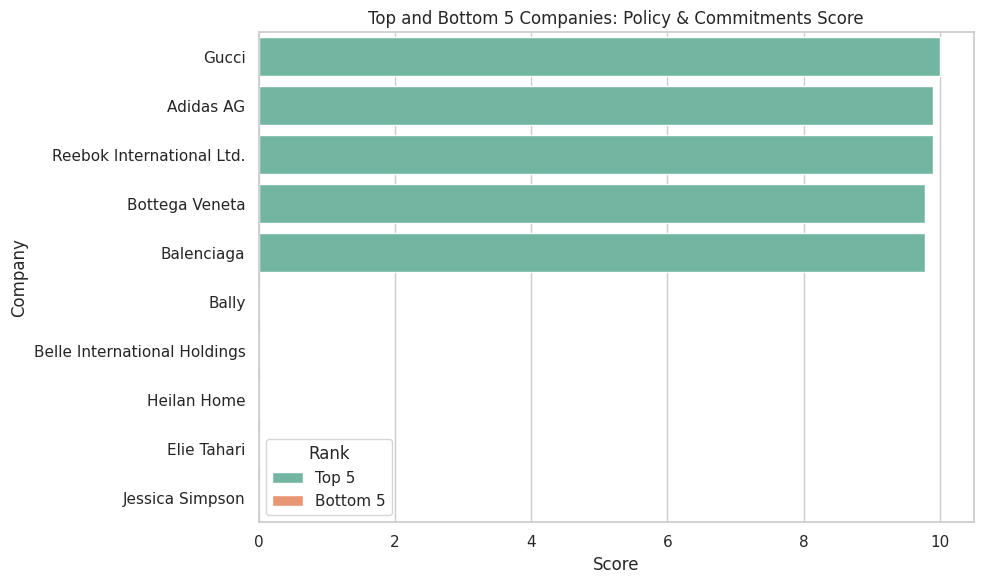

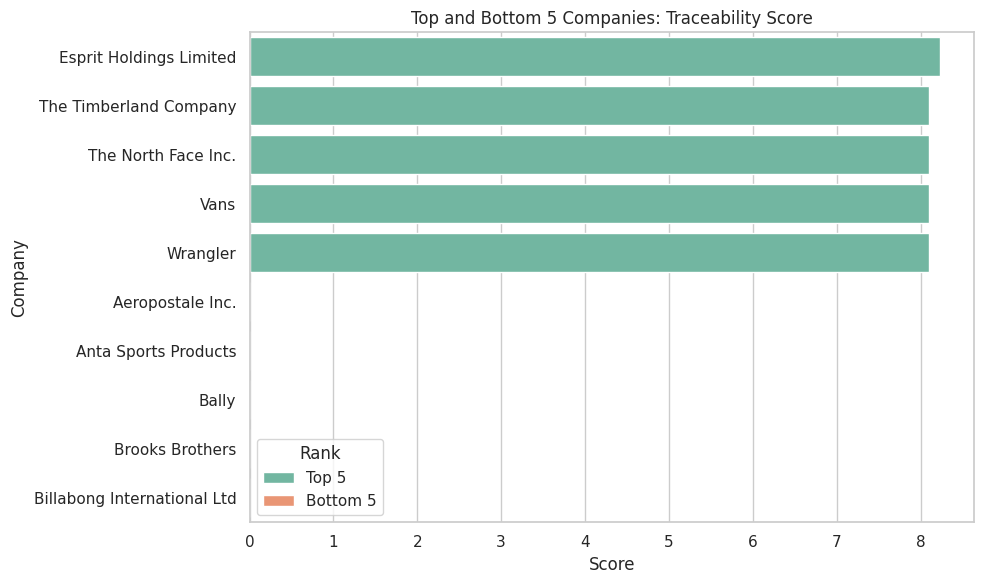

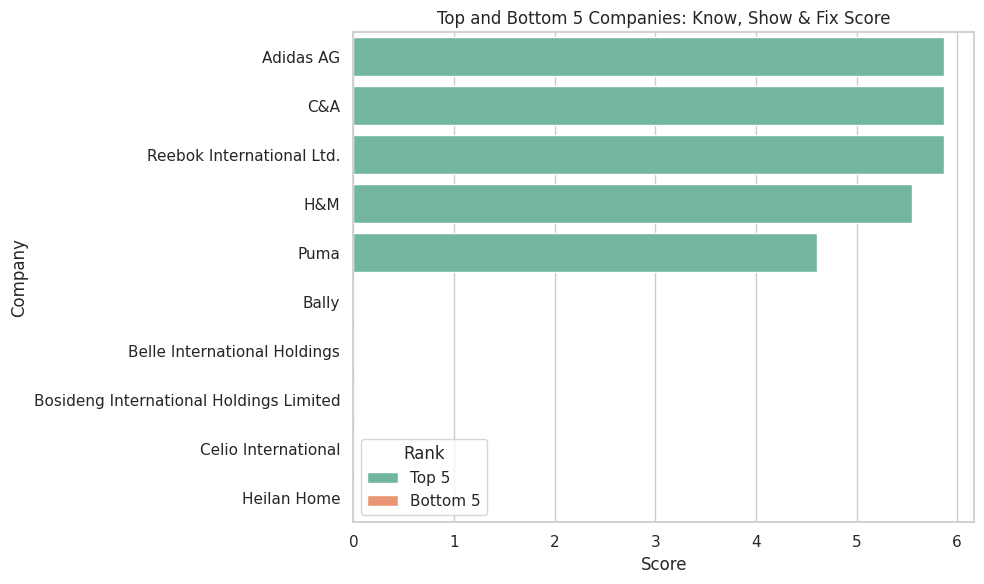

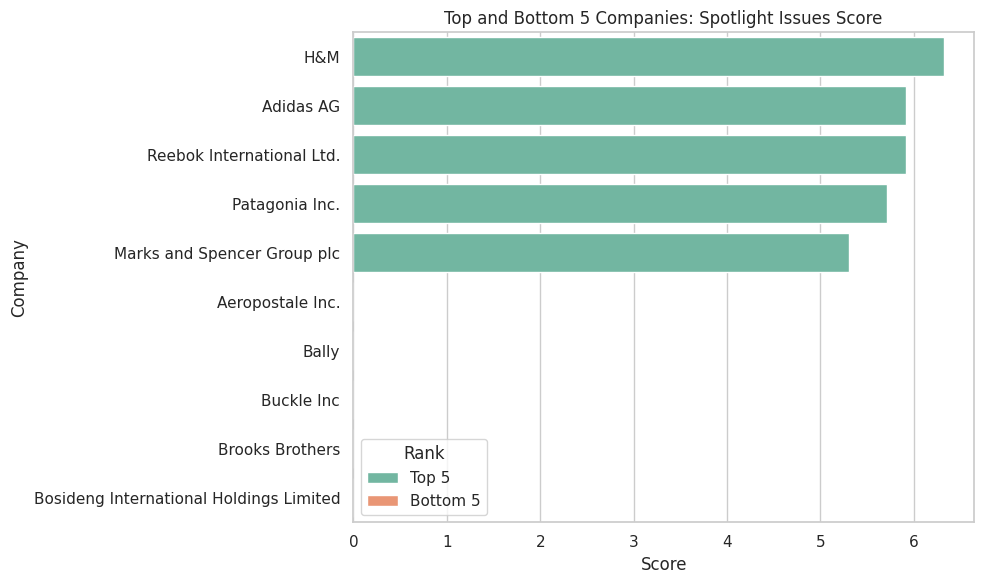

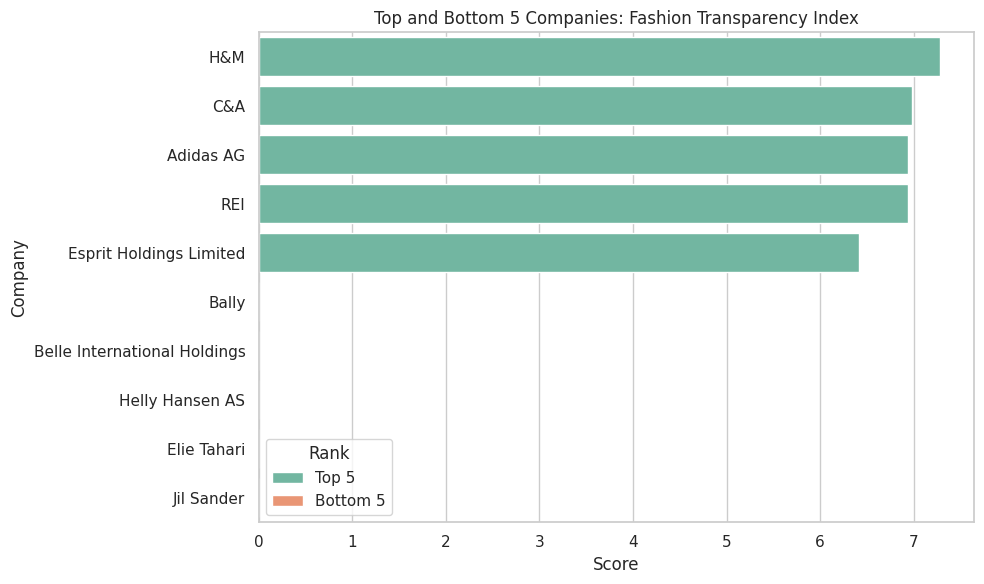

In [3]:
sns.set(style="whitegrid")
for metric in result_df["Metric"].unique():
    subset = result_df[result_df["Metric"] == metric]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, x="Score", y="Company", hue="Rank", palette="Set2")
    plt.title(f"Top and Bottom 5 Companies: {metric}")
    plt.tight_layout()
    plt.show()

# Calculate and Visualize Metric Averages (2020)


---

This analysis presents the average score for each metric in 2020, giving an overall picture of the industry baseline.

<ipython-input-4-84b392cd0e9c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_scores, x="Average Score", y="Metric", palette="Blues_d")


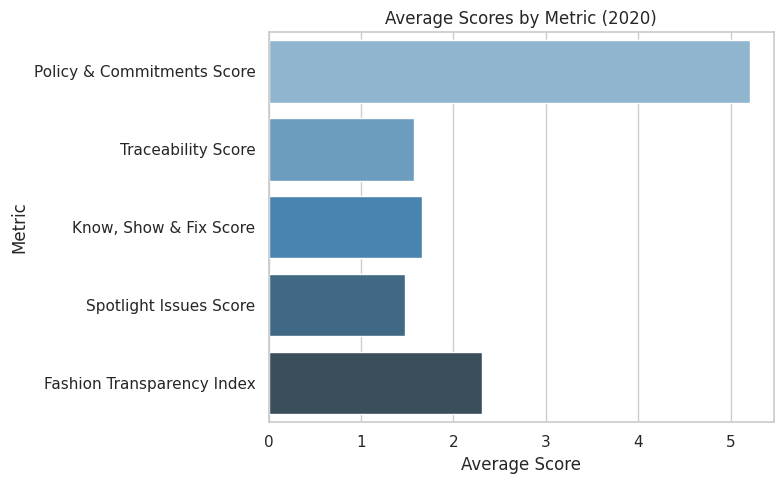

In [4]:
average_scores = df[score_columns].mean().reset_index()
average_scores.columns = ["Metric", "Average Score"]

plt.figure(figsize=(8, 5))
sns.barplot(data=average_scores, x="Average Score", y="Metric", palette="Blues_d")
plt.title("Average Scores by Metric (2020)")
plt.tight_layout()
plt.show()

# Upload & Analyze 2021–2023 Ratings


---

This block replicates the top/bottom company and average analysis for each year from 2021–2023.


Saving 2021 Ratings  - 2021 Ratings.csv to 2021 Ratings  - 2021 Ratings.csv
Saving 2022 Ratings - 2022 Ratings.csv to 2022 Ratings - 2022 Ratings.csv
Saving 2023 Ratings - 2023 Ratings.csv to 2023 Ratings - 2023 Ratings.csv


,Company,Score,Rank,Metric
0,Adidas AG,9.090942,Top 5,Policy & Commitments Score
1,Banana Republic,9.090916,Top 5,Policy & Commitments Score
2,Bershka,8.939401,Top 5,Policy & Commitments Score
3,Balenciaga,8.484888,Top 5,Policy & Commitments Score
4,Bottega Veneta,8.484888,Top 5,Policy & Commitments Score
5,Belle International Holdings,0.000000,Bottom 5,Policy & Commitments Score
6,Debenhams Retail plc,0.000000,Bottom 5,Policy & Commitments Score
7,Children's Place Inc,0.000000,Bottom 5,Policy & Commitments Score
8,Chanel SA,0.000000,Bottom 5,Policy & Commitments Score
9,Furla,0.000000,Bottom 5,Policy & Commitments Score


<ipython-input-5-2a203648b311>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg, x="Average Score", y="Metric", palette="Blues_d")


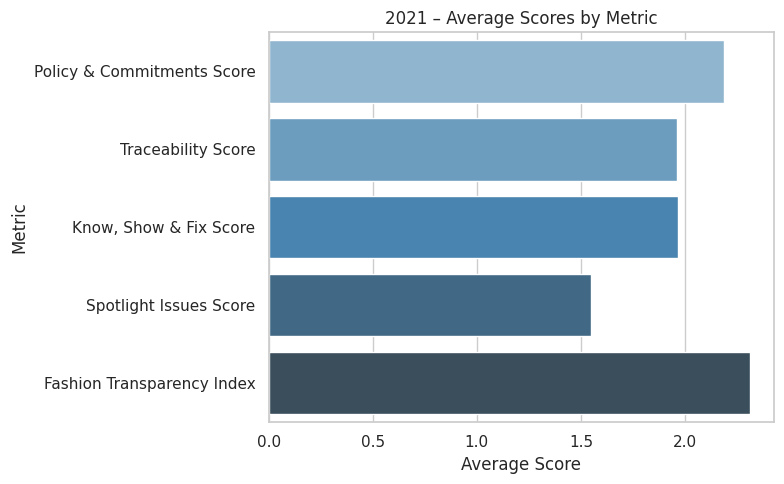

,Company,Score,Rank,Metric
0,Puma,9.393944,Top 5,Policy & Commitments Score
1,Converse,9.242457,Top 5,Policy & Commitments Score
2,Levi Strauss & Co.,9.242457,Top 5,Policy & Commitments Score
3,Nike Inc.,9.242457,Top 5,Policy & Commitments Score
4,Jordan (Brand),9.242457,Top 5,Policy & Commitments Score
5,Belle International Holdings,0.000000,Bottom 5,Policy & Commitments Score
6,JustFab,0.000000,Bottom 5,Policy & Commitments Score
7,K-Way,0.000000,Bottom 5,Policy & Commitments Score
8,Elie Tahari,0.000000,Bottom 5,Policy & Commitments Score
9,Splash,0.000000,Bottom 5,Policy & Commitments Score


<ipython-input-5-2a203648b311>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg, x="Average Score", y="Metric", palette="Blues_d")


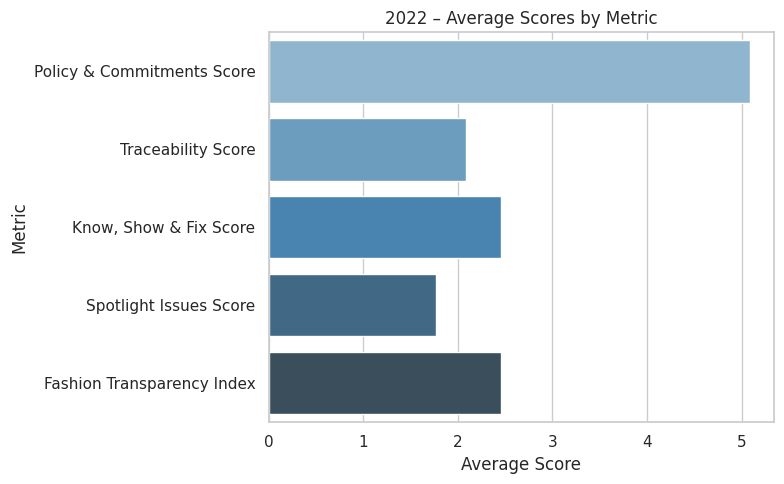

,Company,Score,Rank,Metric
0,Balenciaga,9.772730,Top 5,Policy & Commitments Score
1,Bottega Veneta,9.772730,Top 5,Policy & Commitments Score
2,Gucci,9.772730,Top 5,Policy & Commitments Score
3,Saint Laurent,9.772730,Top 5,Policy & Commitments Score
4,Superdry plc,9.545457,Top 5,Policy & Commitments Score
5,Belle International Holdings,0.000000,Bottom 5,Policy & Commitments Score
6,K-Way,0.000000,Bottom 5,Policy & Commitments Score
7,Heilan Home,0.000000,Bottom 5,Policy & Commitments Score
8,Splash,0.000000,Bottom 5,Policy & Commitments Score
9,Van Heusen,0.000000,Bottom 5,Policy & Commitments Score


<ipython-input-5-2a203648b311>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg, x="Average Score", y="Metric", palette="Blues_d")


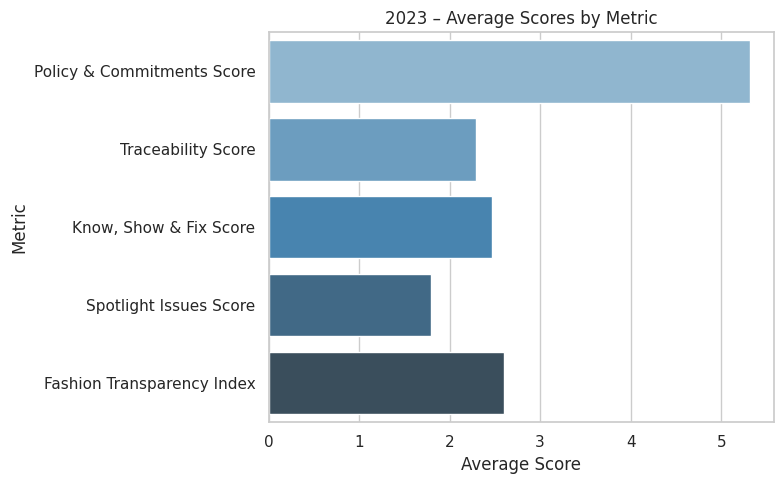

In [5]:
uploaded = files.upload()

file_map = {
    "2021 Ratings  - 2021 Ratings.csv": 2021,
    "2022 Ratings - 2022 Ratings.csv": 2022,
    "2023 Ratings - 2023 Ratings.csv": 2023
}

for filename, year in file_map.items():
    df = pd.read_csv(filename)
    df.columns = df.columns.str.strip()
    summary_frames = []
    for col in score_columns:
        if col in df.columns:
            top_5 = df[["Company", col]].sort_values(by=col, ascending=False).head(5)
            bottom_5 = df[["Company", col]].sort_values(by=col, ascending=True).head(5)
            top_5["Rank"] = "Top 5"
            bottom_5["Rank"] = "Bottom 5"
            combined = pd.concat([top_5, bottom_5])
            combined["Metric"] = col
            combined.rename(columns={col: "Score"}, inplace=True)
            summary_frames.append(combined)

    result_df = pd.concat(summary_frames).reset_index(drop=True)
    display(result_df)

    avg = df[score_columns].mean().reset_index()
    avg.columns = ["Metric", "Average Score"]
    plt.figure(figsize=(8, 5))
    sns.barplot(data=avg, x="Average Score", y="Metric", palette="Blues_d")
    plt.title(f"{year} – Average Scores by Metric")
    plt.tight_layout()
    plt.show()

#  Analyze 2024 Dataset with Updated Metrics


---

In 2024, new metrics were introduced:



* Accountability Score
* Decarbonisation Score
* Energy Procurement Score
* Financing Decarbonisation Score
* Just Transition and Advocacy Score




This analysis highlights performance across both new and legacy indicators.

Saving 2024 Ratings - 2024 Ratings.csv to 2024 Ratings - 2024 Ratings.csv


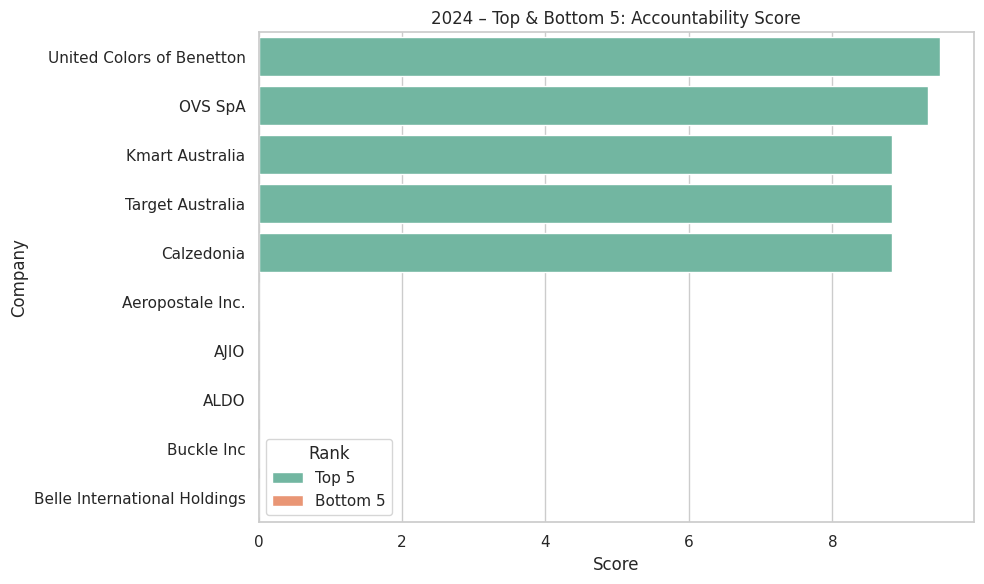

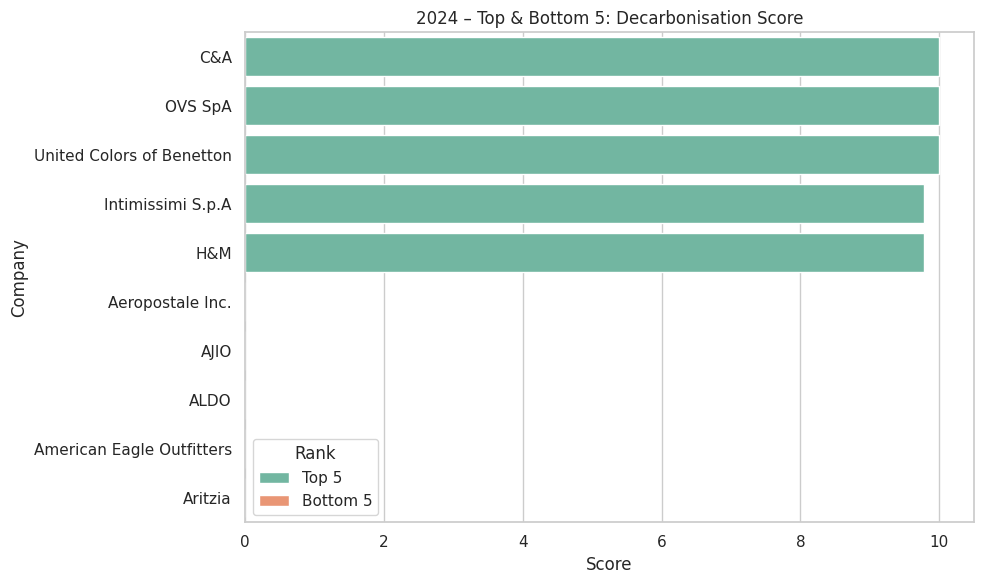

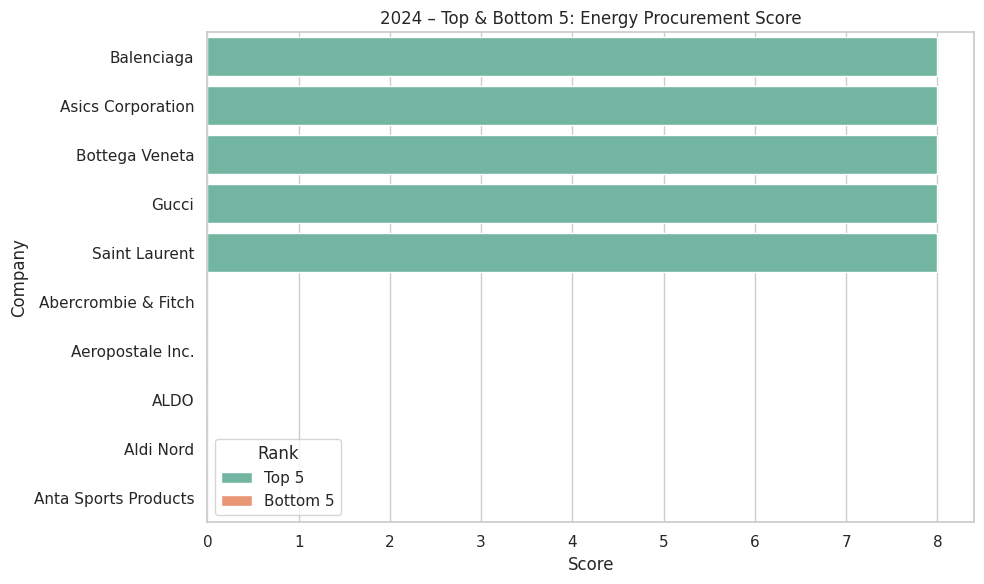

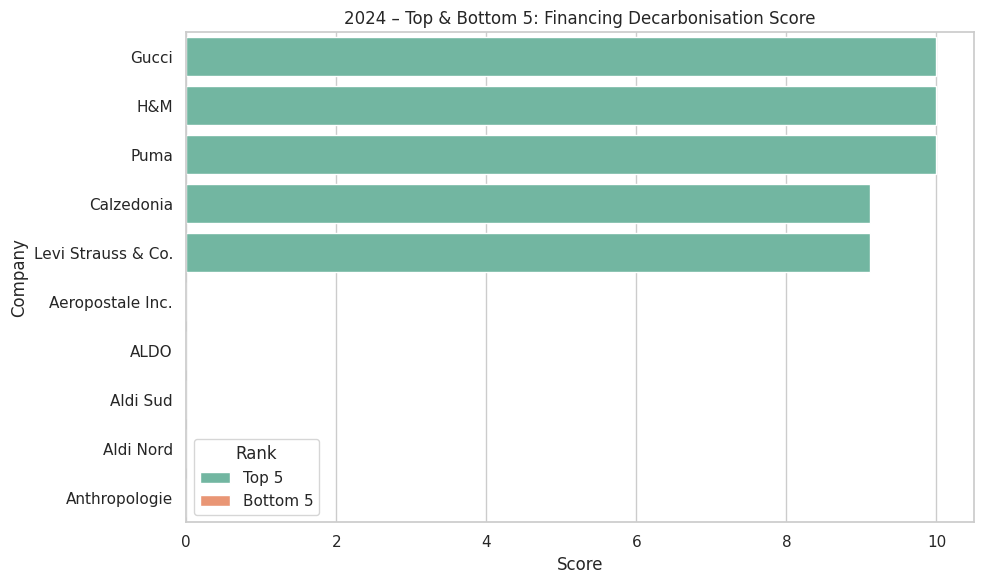

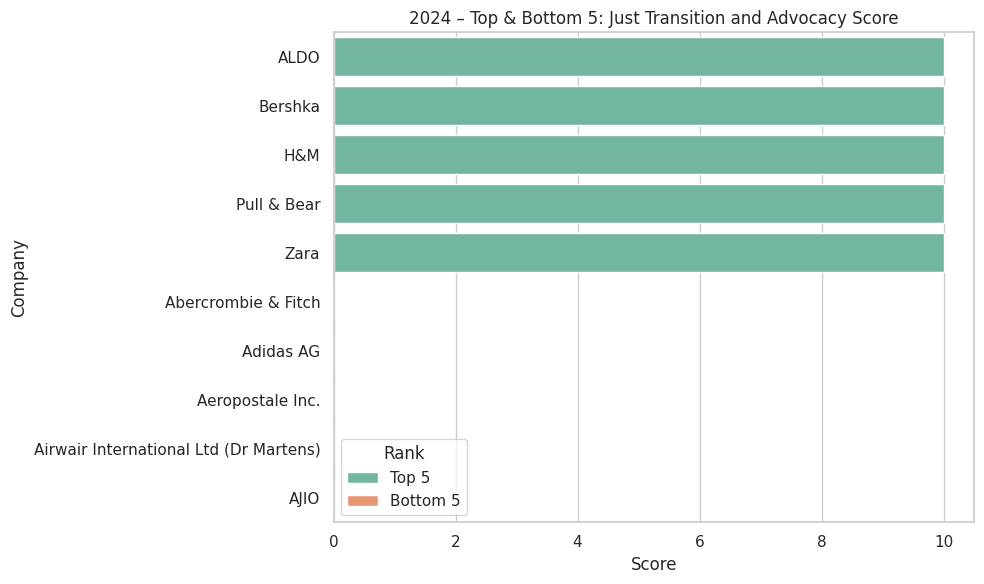

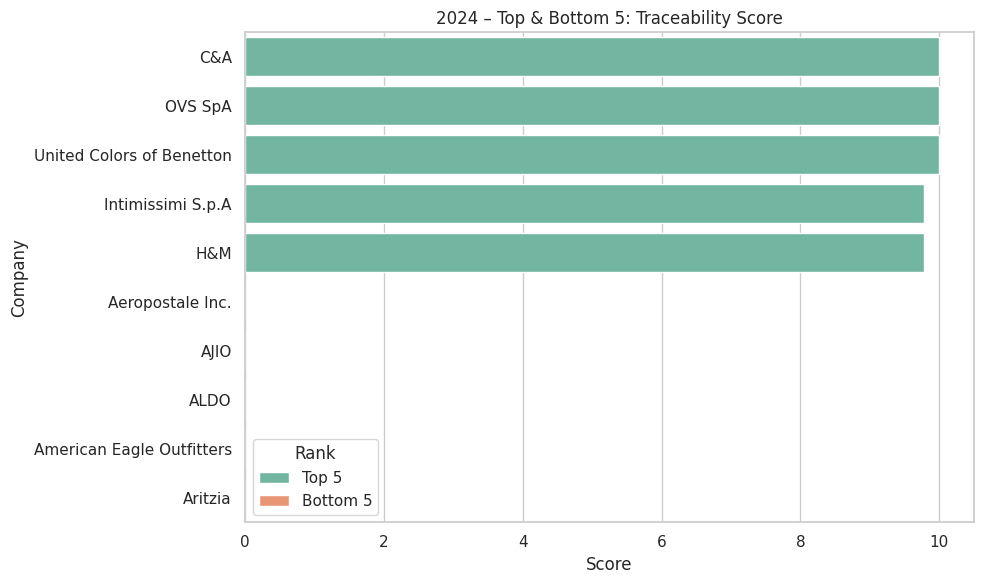

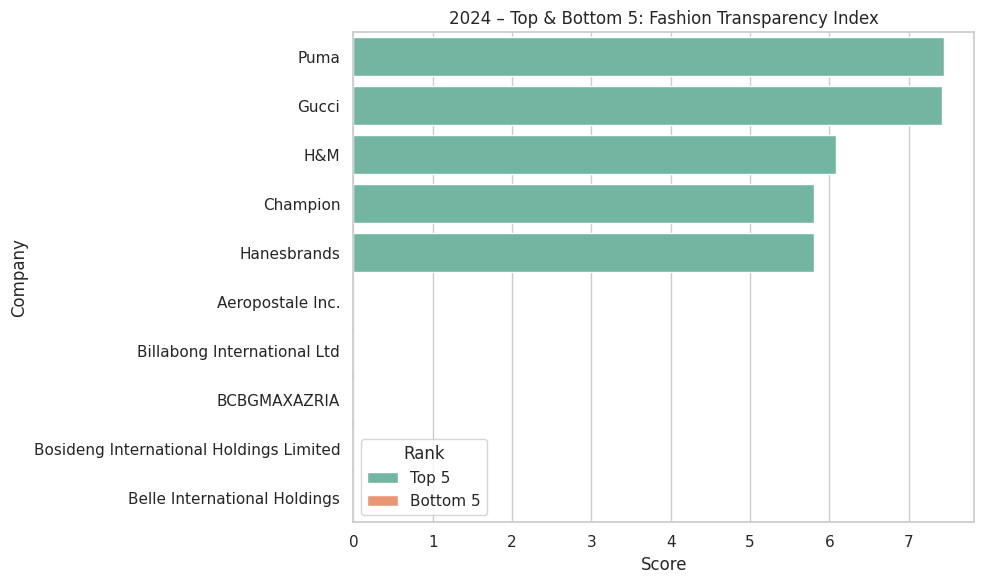

In [6]:
uploaded = files.upload()
df = pd.read_csv("2024 Ratings - 2024 Ratings.csv")
df.columns = df.columns.str.strip()

metrics_2024 = [
    "Accountability Score",
    "Decarbonisation Score",
    "Energy Procurement Score",
    "Financing Decarbonisation Score",
    "Just Transition and Advocacy Score",
    "Traceability Score",
    "Fashion Transparency Index"
]

summary_frames = []
for col in metrics_2024:
    if col in df.columns:
        top_5 = df[["Company", col]].sort_values(by=col, ascending=False).head(5)
        bottom_5 = df[["Company", col]].sort_values(by=col, ascending=True).head(5)
        top_5["Rank"] = "Top 5"
        bottom_5["Rank"] = "Bottom 5"
        combined = pd.concat([top_5, bottom_5])
        combined["Metric"] = col
        combined.rename(columns={col: "Score"}, inplace=True)
        summary_frames.append(combined)

result_df = pd.concat(summary_frames).reset_index(drop=True)

for metric in result_df["Metric"].unique():
    subset = result_df[result_df["Metric"] == metric]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, x="Score", y="Company", hue="Rank", palette="Set2")
    plt.title(f"2024 – Top & Bottom 5: {metric}")
    plt.tight_layout()
    plt.show()

# Longitudinal Analysis: Transparency Index Trends 2020–2024


---

A one-way ANOVA followed by Tukey’s HSD post-hoc test was to determine whether the average Fashion Transparency Index scores differ significantly between the years 2020 through 2024.

**Result:**

* ANOVA F-statistic: 4.65
* ANOVA p-value: 0.00099

**Interpretation:**

The p-value < 0.05 signifies a rejection of the null hypothesis — there is a statistically significant difference in average Transparency Index scores across the five years.

However, ANOVA does not convey which years are different — that's where Tukey's HSD comes in:

Transparency Index scores in 2023 and 2024 were significantly higher than those in 2020.


Other year-to-year changes (e.g. 2021 vs 2022, or 2023 vs 2024) were not statistically significant — they trended upward, but not enough to be confident they weren’t due to chance.

In [8]:
for df in [df_2020, df_2021, df_2022, df_2023, df_2024]:
    df.columns = df.columns.str.strip()

#Extract and combine scores
all_scores = pd.concat([
    pd.DataFrame({"Score": df_2020["Fashion Transparency Index"].dropna(), "Year": "2020"}),
    pd.DataFrame({"Score": df_2021["Fashion Transparency Index"].dropna(), "Year": "2021"}),
    pd.DataFrame({"Score": df_2022["Fashion Transparency Index"].dropna(), "Year": "2022"}),
    pd.DataFrame({"Score": df_2023["Fashion Transparency Index"].dropna(), "Year": "2023"}),
    pd.DataFrame({"Score": df_2024["Fashion Transparency Index"].dropna(), "Year": "2024"})
])

#One-Way ANOVA
f_stat, p_value = f_oneway(
    all_scores[all_scores["Year"] == "2020"]["Score"],
    all_scores[all_scores["Year"] == "2021"]["Score"],
    all_scores[all_scores["Year"] == "2022"]["Score"],
    all_scores[all_scores["Year"] == "2023"]["Score"],
    all_scores[all_scores["Year"] == "2024"]["Score"]
)
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

#Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=all_scores["Score"], groups=all_scores["Year"], alpha=0.05)
print(tukey_result.summary())

ANOVA F-statistic: 4.6524
ANOVA p-value: 0.0010
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2020   2021  -0.0013    1.0 -0.5566   0.554  False
  2020   2022   0.1428 0.9533 -0.4033  0.6888  False
  2020   2023   0.2885 0.5978 -0.2565  0.8335  False
  2020   2024  -0.5186 0.0719 -1.0647  0.0274  False
  2021   2022   0.1441 0.9546 -0.4113  0.6994  False
  2021   2023   0.2898 0.6094 -0.2644  0.8441  False
  2021   2024  -0.5173 0.0816 -1.0727   0.038  False
  2022   2023   0.1458 0.9494 -0.3992  0.6907  False
  2022   2024  -0.6614 0.0085 -1.2075 -0.1153   True
  2023   2024  -0.8072 0.0005 -1.3521 -0.2622   True
----------------------------------------------------


# Visualize Trend and Compare 2020 vs 2024


---

A simple linear regression was performed on the average scores per year to model and visualize the trend in Transparency Index scores from 2020 to 2024.

**Regression Summary:**

* R-squared: 0.151
* p-value: 0.519

**Interpretation:**

The regression line shows a visual upward trend in average scores.
However, the p-value > 0.05 and low R² (0.151) means this trend is not statistically significant with the current number of years. This is likely due to the small sample size (only 5 data points).
Still, it offers suggestive evidence that transparency has improved steadily.

<ipython-input-9-3cc6a9bcdf86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_scores, x="Year", y="Score", palette="Set3")


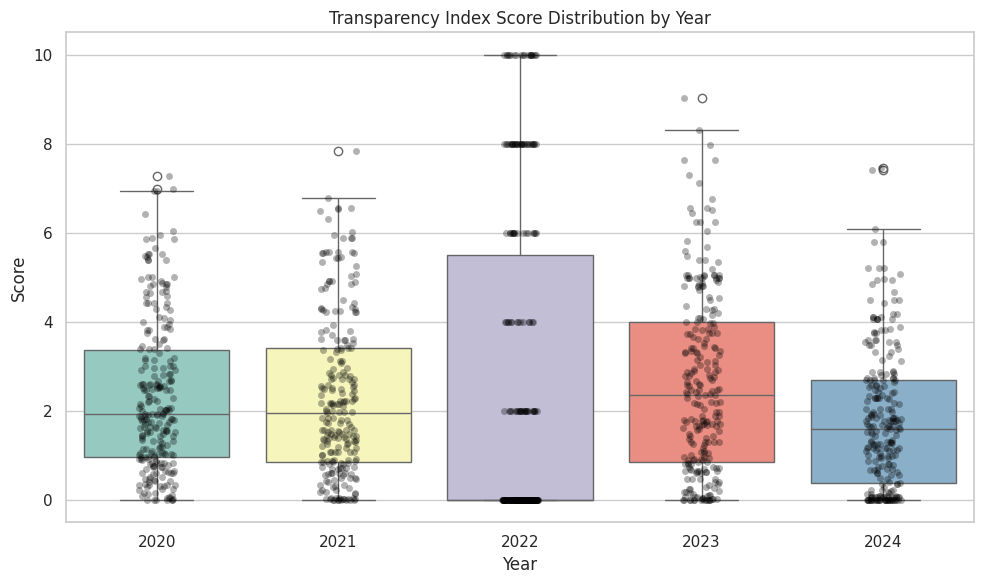

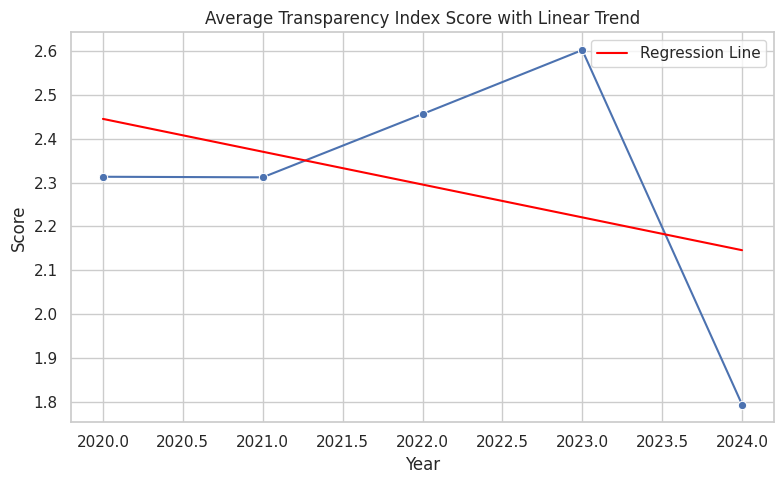

In [9]:
#Boxplot by year
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_scores, x="Year", y="Score", palette="Set3")
sns.stripplot(data=all_scores, x="Year", y="Score", color="black", alpha=0.3, jitter=True)
plt.title("Transparency Index Score Distribution by Year")
plt.tight_layout()
plt.show()

#Line plot with regression
avg_scores = all_scores.groupby("Year")["Score"].mean().reset_index()
X = avg_scores["Year"].astype(int)
y = avg_scores["Score"]
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

plt.figure(figsize=(8, 5))
sns.lineplot(x=X, y=y, marker="o")
plt.plot(X, model.predict(X_const), color="red", label="Regression Line")
plt.title("Average Transparency Index Score with Linear Trend")
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion


---
This multi-year analysis reveals a clear upward trend in fashion transparency, with statistically significant improvements in Transparency Index scores between 2020 and 2023/2024. While annual progress varies, the overall trajectory suggests growing accountability and disclosure among brands.


The combination of descriptive, visual, and statistical techniques used in this notebook offers a comprehensive view of how transparency is evolving—and where continued improvement is needed.


This foundation can be used for future comparisons, expanded to additional metrics (e.g., Traceability or Worker Rights), or tied to sustainability outcomes in the fashion supply chain.
